#**СИСТЕМА ПОДГОТОВКИ ДАННЫХ ИЗ ВЫБОРКИ ОБЪЕКТОВ**

# Глава № I. 
# Аналитическая часть.

Первым делом произведем анализ столбцов и примем предварительное решение что является наиболее важными параметрами. 

По возможности избавимся от типа данных **Float64** и перейдем к **Int64** там, где это не нужно, например в столбце "**год постройки**" и подобные 

Для того чтобы преобразовывать данные мы получаем следующую проблему - пропуски в данных, необходимо избавится от них различными методами. 

Основная идея заключается в том, чтобы удалить первым делом те столбцы где пропусков больше, чем основных значений и важность этого стольбца в нашей модели не существенна, например: 

**loggia** - почти все нули, можно снести, ведь есть другой параметр как **balcon**, который содержит в себе информацию о наличии балкона и передает больше данных 

Далее уже можно перейти к удалению пропусков построчно, опять же там где это возможно или количество удаленных строк будет небольшим - не более 100-200 строк( при датасете размером 71к строк потери данных меньше 0,3-0,5%)

Также есть NaN которые мы по мере возможного будем заменять или преобразовывать в числовое значения для опять же приведения к единому типу данных **Float64** или **Int64**

После данных преобразований можно уже применить ящик с усами, все экстремальные значения которые нам не подходят устранить и работать с балансированным датасетом для обучения модели 


После обработки всех значений было принято решение разбить некоторые колонки по классам для удобного распределения категорий жилья, а также для нахождения более точных взаимосвязей самой моделью на этапе машинного обучения

In [1]:
###################################################################################################
# ОПИСАНИЕ НАИМЕНОВАНИЙ 
###################################################################################################
# 1  # id              - ИД объекта
# 2  # status          - статус объекта (у всех sold - продан)
# 3  # city_id         - идентификатор города
# 4  # district_id     - идентификатор района
# 5  # street_id       - идентификатор улицы
# 6  # price           - последняя цена по которой объект был выставлен на продажу
# 7  # date_sold       - дата продажи обьекта
# 8  # sold_price      - цена за которую объект был продан
# 9  # metro_station_id- идентификатор ближайшей станции метро
# 10 # flat_on_floor   - положение квартиры на этаже (подъездной площадке)
# 11 # floor_num       - этаж
# 12 # floors_cnt      - количество этажей в доме
# 13 # rooms_cnt       - количество комнат
# 14 # bedrooms_cnt    - количество спален
# 15 # building_year   - год постройки дома
# 16 # area_total      - общая площадь
# 17 # area_live       - жилая площадь
# 18 # area_kitchen    - площадь кухни
# 19 # area_balcony    - площадь балконов
# 20 # builder_id      - ид застройщика (можно игнорировать)
# 21 # type            - тип объекта (квартира, комната, общежитие, пансионат, малосемейка)
# 22 # two_levels      - двухуровневая
# 23 # levels_count    - количество уровней
# 24 # bathroom        - тип сан. узла
# 25 # bathrooms_cnt   - количество сан. узлов (если NULL - значит 1)
# 26 # plate           - тип плиты
# 27 # windows         - тип окон
# 28 # territory       - описание придомовой территории, мнемоники объектов перечисленные через запятую
# 29 # keep            - тип отделки квартиры
# 30 # komunal_cost    - средняя стоимость коммунальных платежей
# 31 # series_id       - серия дома
# 32 # wall_id         - тип стен дома
# 33 # balcon          - тип балкона/балконов
# 34 # loggia          - наличие лоджии
# 35 # ceiling_height  - высота потолков
# 36 # closed_yard     - закрытый двор
# 37 # longitude       - долгота объекта
# 38 # latitude        - широта объекта
###################################################################################################
# ПРЕОБРАЗОВАНИЕ ПО ТИПУ ДАННЫХ 
###################################################################################################
# 1  # id                    int64
# 2  # status               object
# 3  # city_id               int64
# 4  # district_id           int64
# 5  # street_id             int64
# 6  # price               float64 - ( можно  заменить на int64 тк все цены указаны без точки, пропуски заменить на 0? )
# 7  # date_sold            object
# 8  # sold_price          float64 - ( можно  заменить на int64 тк все цены указаны без точки, пропуски заменить на 0? )
# 9  # metro_station_id    float64 - ( можно  заменить на int64 тк все станции метро указаны без точки, если нет метро ставится 0, пропуски тоже сделать 0 )
# 10 # flat_on_floor         int64
# 11 # floor_num           float64 - ( можно  заменить на int64 тк этажи указываются без точки, пропуски заменить на ????? )
# 12 # floors_cnt          float64 - ( можно  заменить на int64 тк этажи указываются без точки, пропуски заменить на ????? )
# 13 # rooms_cnt           float64 - ( можно  заменить на int64 тк количество комнат можно указать без точки, пропуски заменить на ?????)
# 14 # bedrooms_cnt        float64 - ( можно  заменить на int64 тк количество спален можно указать без точки, пропуски заменить на ?????)
# 15 # building_year         int64 - ( заменить из float64 на int64, пропуски заменены на 0 )  
# 16 # area_total          float64  
# 17 # area_live           float64
# 18 # area_kitchen        float64
# 19 # area_balcony         object - ( формат объект а по сути площадь в int или float должна быть - данные кринж по сути )
# 20 # builder_id            int64 - ( можно игнорировать или удалить этот кринж ! )
# 21 # type                 object  
# 22 # two_levels           object
# 23 # levels_count          int64
# 24 # bathroom             object
# 25 # bathrooms_cnt       float64 - ( можно  заменить на int64 тк количество сан узлов можно указать без точки, пропуски заменить на ????? )
# 26 # plate                object
# 27 # windows              object
# 28 # territory            object
# 29 # keep                 object
# 30 # komunal_cost         object - ( можно  заменить на int64 тк сумма указана в формате суммы: "4500" или диапазон "2500-4500", пропуски заменить на ????? )
# 31 # series_id           float64 - ( можно  заменить на int64 тк серия дома можно указать без точки, пропуски заменить на ????? )
# 32 # wall_id             float64 - ( можно  заменить на int64 тк серию стен можно указать без точки, пропуски заменить на ????? )
# 33 # balcon               object 
# 34 # loggia                int64 - ( везде указаны нули, мб снести крниж ?)
# 35 # ceiling_height      float64  
# 36 # closed_yard          object - ( закрытый двор отображается как "nan | no | yes" что то мб сделать и перевести в инт? или не надо кринжевать? 	)
# 37 # longitude           float64
# 38 # latitude            float64
###################################################################################################
# КАК БЫТЬ С ПРОПУСКАМИ В ДАННЫХ В СООТВЕТСТВУЮЩИХ КОЛОНКАХ 
###################################################################################################
# 1  # id                    int64 - нет пропусков все значения уникальны тк айди объекта, ничего мне меняем 
# 2  # status               object - удалить столбец 
# 3  # city_id               int64 - 94 айдишки города даны, пропусков судя по всему нет и можно оставить без изменений 
# 4  # district_id           int64 - айди района (2098 параметров), пропусков нет, можно оставить без изменений 
# 5  # street_id             int64 - айди улицы 8229 параметров, пропусков нет омжно оставить без изменений 
# 6  # price               float64 - цены на жилье, имеет где то 10 пропусков, тк цена основопологающий параметр думаю удалить 10 строк с пропусками и все
# 7  # date_sold            object - дату продажи удалить столбец
# 8  # sold_price          float64 - после чистки данных посомтреть на корелляцию если что удалить, пропуски убрать по среднему по серии дома 
# 9  # metro_station_id    float64 - удалить строки
# 10 # flat_on_floor         int64 - удалить столбец 
# 11 # floor_num           float64 - удалить строки с пропусками
# 12 # floors_cnt          float64 - удалить строки с пропусками 
# 13 # rooms_cnt           float64 - так как румс и ареа_тотал кореллируются, то берем ареа тотал квартиры и смотрим корреляцию ареа тотал с румс снт по серии дома 
# 14 # bedrooms_cnt        float64 - сделать среднюю по серии дома, округлить до целого и скинуть в интеджер 
# 15 # building_year         int64 - медиана по серии дома   
# 16 # area_total          float64 - удалить строки с пропусками 
# 17 # area_live           float64 - удалить строки с пропусками
# 18 # area_kitchen        float64 - удалить строки с пропусками
# 19 # area_balcony         object - медиану сделать по серии дома
# 20 # builder_id            int64 - удалить столбец 
# 21 # type                 object - оставить как есть 
# 22 # two_levels           object - удалить строки с пропусками
# 23 # levels_count          int64 - удалить строки с пропусками ( что такое 0 уровень ? мб его удалить? если таких значений мало?)
# 24 # bathroom             object - удалить строки с пропусками
# 25 # bathrooms_cnt       float64 - везде где NULL сделать 1 
# 26 # plate                object - удалить столбец 
# 27 # windows              object - удалить строки с пропусками
# 28 # territory            object - заменить на количество плюшек цифрой (чем больеше тем круче), сделать медиана по серии дома
# 29 # keep                 object - удалить строки с пропусками
# 30 # komunal_cost         object - удалить столбец 
# 31 # series_id           float64 - удалить все строки с пропусками 
# 32 # wall_id             float64 - удалить строки
# 33 # balcon               object - удалить строки с пропусками
# 34 # loggia                int64 - удалить полностью столбец 
# 35 # ceiling_height      float64 - найти выбросы и исправить 
# 36 # closed_yard          object - удалить столбец
# 37 # longitude           float64 - удалить столбец 
# 38 # latitude            float64 - удалить столбец 

Подключим гугл диск с датасетом и необходимые для работы библиотеки 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import tensorflow as tf
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Выведем все колонки и посмотрим на точный размер датасета и типы данных для будущего преобразования:

In [41]:
file_flat = ('/content/drive/MyDrive/Colab Notebooks/files_labs/E-SOFT/sold_flats_2020-09-30.csv')
data_flat = pd.read_csv(file_flat, sep=",")
display(data_flat.info());
display(data_flat.shape);


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71761 non-null  int64  
 1   status            71761 non-null  object 
 2   city_id           71761 non-null  int64  
 3   district_id       71761 non-null  int64  
 4   street_id         71761 non-null  int64  
 5   price             71751 non-null  float64
 6   date_sold         71761 non-null  object 
 7   sold_price        71621 non-null  float64
 8   metro_station_id  71756 non-null  float64
 9   flat_on_floor     71761 non-null  int64  
 10  floor_num         71755 non-null  float64
 11  floors_cnt        71755 non-null  float64
 12  rooms_cnt         71479 non-null  float64
 13  bedrooms_cnt      71015 non-null  float64
 14  building_year     70168 non-null  float64
 15  area_total        71758 non-null  float64
 16  area_live         71758 non-null  float6

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

(71761, 38)

Выведем топ 100 строк у датасета без ограничений по количеству колонок, посмотрим на данные

In [5]:
display(data_flat.head(100))

,id,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,area_live,area_kitchen,area_balcony,builder_id,type,two_levels,levels_count,bathroom,bathrooms_cnt,plate,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude
0,86668,sold,23,12440,353,4980.0,2014-05-16,4880.0,0.0,0,5.0,9.0,3.0,0.0,1989.0,62.0,0.0,8.0,0,0,flat,no,1,unite,NaN,electric,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN,65.552498,57.143242
1,87951,sold,23,5279,263,2550.0,2014-02-17,2550.0,0.0,0,5.0,10.0,1.0,0.0,2008.0,40.0,0.0,8.0,0,0,flat,no,1,separate,NaN,electric,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN,65.567250,57.110282
2,90703,sold,23,588,339,2200.0,2014-07-04,2200.0,0.0,0,5.0,5.0,2.0,0.0,1969.0,44.0,0.0,6.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN,65.593887,57.147141
3,92948,sold,23,139,546,650.0,2014-09-03,650.0,0.0,0,1.0,4.0,2.0,0.0,1960.0,42.0,26.7,6.0,0,0,flat,no,1,separate,NaN,no_plate,plastic,"parking,guest_parking,yard_opened,without_elevator",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN,65.518670,57.144386
4,102940,sold,23,5279,263,3300.0,2017-11-09,3300.0,0.0,0,1.0,10.0,3.0,3.0,2007.0,65.0,38.0,12.0,4,0,flat,no,1,separate,2.0,electric,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN,65.568459,57.113392
5,112013,sold,23,154,509,2200.0,2014-07-04,2200.0,0.0,0,4.0,5.0,2.0,0.0,1988.0,47.3,0.0,9.0,0,0,flat,no,1,unite,NaN,NaN,plastic,"child_place,parking,without_elevator",cosmetic,NaN,49.0,12.0,balcon,0,0.00,NaN,NaN,NaN
6,113571,sold,23,142,310,3500.0,2014-07-31,3500.0,0.0,0,9.0,9.0,4.0,0.0,1979.0,72.1,49.4,8.0,6.8,0,flat,no,1,unite,NaN,electric,plastic,"parking,yard_opened,elevator",cosmetic,NaN,46.0,11.0,loggia,0,2.60,NaN,65.599953,57.110821
7,115253,sold,23,126,360,6750.0,2014-08-13,6750.0,0.0,0,4.0,9.0,4.0,0.0,1999.0,115.0,0.0,14.0,0,0,flat,no,1,unite,NaN,electric,plastic,"kolyasochnaya,parking,guest_parking,yard_opened,elevator",cosmetic,NaN,50.0,12.0,loggia,0,0.00,NaN,65.592903,57.137402
8,115505,sold,23,12437,280,2200.0,2017-06-27,2000.0,0.0,0,3.0,9.0,1.0,1.0,1980.0,33.0,0.0,0.0,0,0,flat,no,1,separate,2.0,NaN,plastic,"parking,closed,elevator",cosmetic,NaN,133.0,12.0,yes_balcon,0,2.50,NaN,65.556702,57.154491
9,118619,sold,23,12437,340,4300.0,2014-08-29,4300.0,0.0,0,2.0,10.0,1.0,0.0,2006.0,52.0,0.0,13.0,0,0,flat,no,1,unite,NaN,electric,plastic,"kolyasochnaya,parking,subway_parking,closed,elevator,cargo_elevator",cosmetic,NaN,44.0,11.0,balcon,0,3.00,NaN,65.544638,57.159309


Напишем код, который будет выводить в виде от наибольшего - к наименьшему все колонки которые обладают NaN, также выведем значения и их количество в этих колонках  

*(если значнеия все уникальные - такие как цена и прочие, то будет написано "много")*



In [6]:
df_columns_unique = pd.DataFrame({'name_columns': [], 'len_value_columns_unique': [], 'value_columns_unique': [], 'count_NaN_columns':[]})
for name_columns in data_flat.columns:

    data_sort = data_flat.sort_values(by=[f'{name_columns}'], ascending=False)
    value_columns_unique = data_sort[f'{name_columns}'].unique()
    len_value_columns_unique = len(value_columns_unique)
    count_NaN_columns = pd.isna(data_flat[f'{name_columns}']).sum()

    if name_columns == 'series_id':
      value_columns_unique = ' | '.join(map(str, value_columns_unique))
    elif len_value_columns_unique > 200 :
      value_columns_unique = "Много"
    else:
      value_columns_unique = ' | '.join(map(str, value_columns_unique))

   

    df_columns_unique.loc[len(df_columns_unique.index)] = [str(name_columns), str(len_value_columns_unique), str(value_columns_unique), count_NaN_columns]
display(df_columns_unique.sort_values(by=['count_NaN_columns'], ascending=False))

,name_columns,len_value_columns_unique,value_columns_unique,count_NaN_columns
35,closed_yard,3,yes | no | nan,68579.0
29,komunal_cost,739,Много,64381.0
25,plate,9,"no_plate,gas,electric | no_plate,gas | no_plate,electric | no_plate | gas,electric | gas | electric | convective | nan",38982.0
24,bathrooms_cnt,6,4.0 | 3.0 | 2.0 | 1.0 | 0.0 | nan,31131.0
18,area_balcony,887,Много,14369.0
37,latitude,27235,Много,6571.0
36,longitude,27370,Много,6571.0
14,building_year,148,41986.0 | 2029.0 | 2024.0 | 2022.0 | 2021.0 | 2020.0 | 2019.0 | 2018.0 | 2017.0 | 2016.0 | 2015.0 | 2014.0 | 2013.0 | 2012.0 | 2011.0 | 2010.0 | 2009.0 | 2008.0 | 2007.0 | 2006.0 | 2005.0 | 2004.0 | 2003.0 | 2002.0 | 2001.0 | 2000.0 | 1999.0 | 1998.0 | 1997.0 | 1996.0 | 1995.0 | 1994.0 | 1993.0 | 1992.0 | 1991.0 | 1990.0 | 1989.0 | 1988.0 | 1987.0 | 1986.0 | 1985.0 | 1984.0 | 1983.0 | 1982.0 | 1981.0 | 1980.0 | 1979.0 | 1978.0 | 1977.0 | 1976.0 | 1975.0 | 1974.0 | 1973.0 | 1972.0 | 1971.0 | 1970.0 | 1969.0 | 1968.0 | 1967.0 | 1966.0 | 1965.0 | 1964.0 | 1963.0 | 1962.0 | 1961.0 | 1960.0 | 1959.0 | 1958.0 | 1957.0 | 1956.0 | 1955.0 | 1954.0 | 1953.0 | 1952.0 | 1951.0 | 1950.0 | 1949.0 | 1948.0 | 1947.0 | 1946.0 | 1945.0 | 1944.0 | 1943.0 | 1941.0 | 1940.0 | 1939.0 | 1938.0 | 1937.0 | 1936.0 | 1935.0 | 1934.0 | 1933.0 | 1932.0 | 1931.0 | 1930.0 | 1929.0 | 1928.0 | 1927.0 | 1926.0 | 1925.0 | 1924.0 | 1922.0 | 1920.0 | 1918.0 | 1917.0 | 1916.0 | 1915.0 | 1913.0 | 1912.0 | 1910.0 | 1907.0 | 1905.0 | 1903.0 | 1900.0 | 1892.0 | 1890.0 | 1889.0 | 1888.0 | 1887.0 | 1880.0 | 1876.0 | 1870.0 | 1868.0 | 1863.0 | 1860.0 | 1850.0 | 1814.0 | 168.0 | 101.0 | 91.0 | 89.0 | 85.0 | 80.0 | 76.0 | 71.0 | 70.0 | 68.0 | 62.0 | 53.0 | 47.0 | 19.0 | 17.0 | 4.0 | 3.0 | 2.0 | 1.0 | 0.0 | nan,1593.0
27,territory,1639,Много,1589.0
13,bedrooms_cnt,21,385.0 | 138.0 | 80.0 | 60.0 | 54.0 | 41.0 | 39.0 | 37.0 | 34.0 | 20.0 | 14.0 | 12.0 | 10.0 | 6.0 | 5.0 | 4.0 | 3.0 | 2.0 | 1.0 | 0.0 | nan,746.0


# Глава № II. 
# ПРЕОБРАЗОВАНИЕ ДАННЫХ.


Удаляем следующие столбцы целиком ввиду того что пользы для нас они не принесут: 



```
'status' - все квартиры имеют статус "sold" по условию задачи
'date_sold' - дата продажи не несет рамках задачи никакого смысла
'flat_on_floor' - положение квартиры на этаже? Куча разных значений, нет смысла
'builder_id' - можно игнорировать по условию задачи 
'plate' - 38 тысяч пропусков в этой колонке, ну и в добавок не думаю что человек может передумать насчет покупки квартиры если там будет какая-то не такая плита 
'komunal_cost' - из 71к строк заполнено около 700 строк
'closed_yard' - 68,5к пропусков по этому параметру 
'longitude' - координа X, в нашем случае можно удалить тк вбив координаты на карте можно понять что высокий разброс продаж по всей россии, для анализа по регионам слишком маленькая выборка, чтобы не путать данные можно просто удалить в рамках этого ТЗ 
'latitude' - координа Y, аналогичко как спунктом выше
'loggia' - победитель в номинации "самый ненужный параметр", во всех строках значение 0 :)
'area_balcony' - 15к пропусков, остальное почти все равняется нулю
'area_kitchen' - 700 значений площади, остальное нули
'area_live' - 48177 значений равно 0
'metro_station_id' - 69525 значений равно 0 И -1
'levels_count' - 70738 значений равно 1
'ceiling_height' - удаляем этот столбец тк 90% квартир в датасете с высотой потолков 2,5-2,75м
```



In [7]:
data_transformation = data_flat.copy(deep=True) 
data_transformation = data_transformation.drop(columns=['status',
                                                        'date_sold',
                                                        'flat_on_floor',
                                                        'builder_id',
                                                        'plate',
                                                        'komunal_cost',
                                                        'closed_yard',
                                                        'longitude',
                                                        'latitude',
                                                        'loggia',
                                                        'area_balcony',
                                                        'area_live',
                                                        'area_kitchen',
                                                        'metro_station_id',
                                                        'levels_count',
                                                        'ceiling_height'],axis = 1)

Теперь у нас осталось 22 колоноки из 38 первоначальных

In [8]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             71761 non-null  int64  
 1   city_id        71761 non-null  int64  
 2   district_id    71761 non-null  int64  
 3   street_id      71761 non-null  int64  
 4   price          71751 non-null  float64
 5   sold_price     71621 non-null  float64
 6   floor_num      71755 non-null  float64
 7   floors_cnt     71755 non-null  float64
 8   rooms_cnt      71479 non-null  float64
 9   bedrooms_cnt   71015 non-null  float64
 10  building_year  70168 non-null  float64
 11  area_total     71758 non-null  float64
 12  type           71761 non-null  object 
 13  two_levels     71758 non-null  object 
 14  bathroom       71760 non-null  object 
 15  bathrooms_cnt  40630 non-null  float64
 16  windows        71760 non-null  object 
 17  territory      70172 non-null  object 
 18  keep  

None

(71761, 22)

**Удаляем стороки, где в столбцах колличесво пропусков меньше 200**

In [9]:
data_transformation = data_transformation.dropna(subset=['keep','price','floors_cnt','wall_id','floor_num','area_total','two_levels','balcon','bathroom','windows', 'series_id','sold_price'])

**В столбце bathrooms_cnt пропуски со значением Null заменяем на 1 (разрешено по условию задачи)** 

In [ ]:
data_transformation['bathrooms_cnt'] = data_transformation['bathrooms_cnt'].fillna(1)
data_transformation['bathrooms_cnt'] = data_transformation['bathrooms_cnt'].replace(0, 1)

**В столбце  territory заменяем мнемоники на их колличесво, игнорируя NaN**

In [ ]:
data_transformation['territory'] = data_transformation['territory'].apply(lambda x: len(x.split(',')) if pd.notna(x) else np.nan)

**Создаем новый столбец в котором будем соотносить данные от city_id, district_id,  street_id для более качественной классификации параметров**

In [12]:
data_transformation['city_district_id'] = data_transformation.apply(lambda x: f"{x['city_id']}_{x['district_id']}", axis=1)
data_transformation['city_street_id'] = data_transformation.apply(lambda x: f"{x['city_id']}_{x['street_id']}", axis=1)

In [13]:
display(data_transformation.head(10))

,id,city_id,district_id,street_id,price,sold_price,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,type,two_levels,bathroom,bathrooms_cnt,windows,territory,keep,series_id,wall_id,balcon,city_district_id,city_street_id
0,86668,23,12440,353,4980.0,4880.0,5.0,9.0,3.0,0.0,1989.0,62.0,flat,no,unite,1.0,plastic,3.0,cosmetic,46.0,11.0,yes_balcon,23_12440,23_353
1,87951,23,5279,263,2550.0,2550.0,5.0,10.0,1.0,0.0,2008.0,40.0,flat,no,separate,1.0,wood,4.0,well_black,50.0,12.0,yes_balcon,23_5279,23_263
2,90703,23,588,339,2200.0,2200.0,5.0,5.0,2.0,0.0,1969.0,44.0,flat,no,separate,1.0,plastic,3.0,cosmetic,45.0,12.0,yes_balcon,23_588,23_339
3,92948,23,139,546,650.0,650.0,1.0,4.0,2.0,0.0,1960.0,42.0,flat,no,separate,1.0,plastic,4.0,need,79.0,11.0,no_balcon,23_139,23_546
4,102940,23,5279,263,3300.0,3300.0,1.0,10.0,3.0,3.0,2007.0,65.0,flat,no,separate,2.0,plastic,4.0,good,50.0,12.0,loggia,23_5279,23_263
5,112013,23,154,509,2200.0,2200.0,4.0,5.0,2.0,0.0,1988.0,47.3,flat,no,unite,1.0,plastic,3.0,cosmetic,49.0,12.0,balcon,23_154,23_509
6,113571,23,142,310,3500.0,3500.0,9.0,9.0,4.0,0.0,1979.0,72.1,flat,no,unite,1.0,plastic,3.0,cosmetic,46.0,11.0,loggia,23_142,23_310
7,115253,23,126,360,6750.0,6750.0,4.0,9.0,4.0,0.0,1999.0,115.0,flat,no,unite,1.0,plastic,5.0,cosmetic,50.0,12.0,loggia,23_126,23_360
8,115505,23,12437,280,2200.0,2000.0,3.0,9.0,1.0,1.0,1980.0,33.0,flat,no,separate,2.0,plastic,3.0,cosmetic,133.0,12.0,yes_balcon,23_12437,23_280
9,118619,23,12437,340,4300.0,4300.0,2.0,10.0,1.0,0.0,2006.0,52.0,flat,no,unite,1.0,plastic,6.0,cosmetic,44.0,11.0,balcon,23_12437,23_340


**В следующих столбцах заменим уникальные значения на соотвесвующие классы**



```
'type', 'bathroom', 'windows', 'keep', 'balcon', 'two_levels', 'city_district_id','city_street_id'
```



In [14]:
data_factorize_name_columns = ['type', 'bathroom', 'windows', 'keep', 'balcon', 'two_levels', 'city_district_id','city_street_id']
for name_columns in data_factorize_name_columns:
    codes, uniques = pd.factorize(data_transformation[f'{name_columns}'])
    data_transformation[f'{name_columns}'] = codes



**Убираем экстримальные значения в building_year**

In [15]:
data_transformation['building_year'] = data_transformation['building_year'].replace({
    168.0: 1968,
    101.0: 2001,
    91.0: 1991,
    89.0: 1989,
    85.0: 1985,
    80.0: 1980,
    76.0: 1976,
    71.0: 1971,
    70.0: 1970,
    68.0: 1968,
    62.0: 1962,
    53.0: 1953,
    47.0: 1947,
    19.0: 2019,
    17.0: 2017,
    4.0: 2004,
    3.0: 2003,
    2.0: 2002,
    1.0: 2001,
    0.0: 2000,
    41986.0: 1986
})



**Убираем строки где bedrooms_cnt равно нулю**

In [16]:
data_transformation = data_transformation.drop(data_transformation[(data_transformation['rooms_cnt'] == 0) | 
                                                                   (data_transformation['wall_id'] == 0) | 
                                                                   (data_transformation['series_id'] == 0) | 
                                                                   (data_transformation['floors_cnt'] == 0)].index)



**Все что ниже 1000 в параметре sold_price и price удалим строки.
Все что выше 10 млн аналогично.**

In [17]:
data_transformation = data_transformation.drop(data_transformation[(data_transformation['price'] < 1000)|(data_transformation['sold_price'] < 1000)|(data_transformation['price'] >= 10000000)|(data_transformation['sold_price'] >= 10000000)].index)

**В sold_price и price дописываем не достающие нули, чтобы везде цена была семизначным чилсом**

In [18]:
def add_zeros(number):
    number_str = str(int(number))
    while len(number_str) < 7:
        number_str += '0'
    return int(number_str)

data_transformation['price'] = data_transformation['price'].apply(add_zeros)
data_transformation['sold_price'] = data_transformation['sold_price'].apply(add_zeros)

**Удалим значения area_total которые меньше 10  и выше 130 ( площадь квартиры)**

In [19]:
data_transformation = data_transformation.drop(data_transformation[(data_transformation['area_total'] < 10) | 
                                                                   (data_transformation['area_total'] > 130)].index)



**Построим ящик с усами и проанализируем то, какие строки являются выбросами и откинем их в последствии**

In [20]:
data_factorize_name_columns = ['price', 'sold_price', 'floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'area_total', 'bathrooms_cnt' , 'territory', 'wall_id', 'series_id']
df_columns_outliers = pd.DataFrame({'name_columns \n q1 или q2 или q3': [], 'outliers': [], 'count':[]})

for name_columns in data_factorize_name_columns:

        q1 = data_transformation[f'{name_columns}'].quantile(0.25)
        q3 = data_transformation[f'{name_columns}'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_q1 = data_transformation[(data_transformation[f'{name_columns}'] <= lower_bound)][f'{name_columns}'].sort_values(ascending=False)
        outliers_q2 = data_transformation[(data_transformation[f'{name_columns}'] > lower_bound) & (data_transformation[f'{name_columns}'] < upper_bound)][f'{name_columns}'].sort_values(ascending=False)
        outliers_q3 = data_transformation[(data_transformation[f'{name_columns}'] >= upper_bound)][f'{name_columns}'].sort_values(ascending=False)

        df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns +'\n q1'),str(lower_bound),outliers_q1.shape[0]]

        for uni in outliers_q1.unique():
            q1_count = data_transformation[(data_transformation[f'{name_columns}'] == uni)].shape[0]
            df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns),uni,q1_count]

        df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns +'\n q2'), "q2",outliers_q2.shape[0]]
       

        for uni in outliers_q2.unique():
            q2_count = data_transformation[(data_transformation[f'{name_columns}'] == uni)].shape[0]
            df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns),uni,q2_count]

        df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns +'\n q3'),str(upper_bound),outliers_q3.shape[0]]

        for uni in outliers_q3.unique():
            q3_count = data_transformation[(data_transformation[f'{name_columns}'] == uni)].shape[0]
            df_columns_outliers.loc[len(df_columns_outliers.index)] = [str(name_columns),uni,q3_count]

        
display(df_columns_outliers)

,name_columns \n q1 или q2 или q3,outliers,count
0,price\n q1,-412500.0,0.0
1,price\n q2,q2,63591.0
2,price,5360000,1.0
3,price,5350000,26.0
4,price,5347000,1.0
5,price,5341000,1.0
6,price,5332000,1.0
7,price,5330000,1.0
8,price,5302000,1.0
9,price,5300000,147.0


**УДАЛЯЕМ ВЫБРОСЫ**

In [21]:
data_factorize_name_columns = ['floor_num', 'floors_cnt', 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'bathrooms_cnt' , 'territory']
for name_columns in data_factorize_name_columns:
    q1 = data_transformation[f'{name_columns}'].quantile(0.25)
    q3 = data_transformation[f'{name_columns}'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data_transformation[(data_transformation[f'{name_columns}'] < lower_bound) | (data_transformation[f'{name_columns}'] > upper_bound)][f'{name_columns}'].unique()
    data_transformation = data_transformation[~data_transformation[f'{name_columns}'].isin(outliers)]



In [22]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59684 entries, 0 to 71757
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59684 non-null  int64  
 1   city_id           59684 non-null  int64  
 2   district_id       59684 non-null  int64  
 3   street_id         59684 non-null  int64  
 4   price             59684 non-null  int64  
 5   sold_price        59684 non-null  int64  
 6   floor_num         59684 non-null  float64
 7   floors_cnt        59684 non-null  float64
 8   rooms_cnt         59581 non-null  float64
 9   bedrooms_cnt      59271 non-null  float64
 10  building_year     58436 non-null  float64
 11  area_total        59684 non-null  float64
 12  type              59684 non-null  int64  
 13  two_levels        59684 non-null  int64  
 14  bathroom          59684 non-null  int64  
 15  bathrooms_cnt     59684 non-null  float64
 16  windows           59684 non-null  int64 

None

(59684, 24)

**В столбцах  'territory', 'rooms_cnt', 'bedrooms_cnt', 'building_year' заменяем NaN на медианые значение у столбцов серии дома**

In [ ]:
def replace_nan_median(row):
  
    data_factorize_name_columns = ['territory', 'rooms_cnt', 'bedrooms_cnt', 'building_year']

    for name_columns in data_factorize_name_columns:

        if pd.isna(row[f'{name_columns}']):
          median_val = data_transformation[data_transformation['series_id'] == row['series_id']][f'{name_columns}'].median() 
          if pd.isna(median_val):
                return row
          row[f'{name_columns}'] = round(median_val)

    return row

data_transformation = data_transformation.apply(replace_nan_median, axis=1)
data_transformation = data_transformation.dropna(subset=['territory','rooms_cnt', 'bedrooms_cnt','building_year'])

**Меняем тип object и float на int**

In [24]:
data_astype_name_columns = ['id','city_id','district_id','street_id', 'price', 'sold_price', 'floor_num', 'floors_cnt', 'bedrooms_cnt','building_year','bathrooms_cnt','territory','series_id','wall_id','keep','windows','balcon','rooms_cnt','type','two_levels','bathroom']
for name_columns in data_astype_name_columns:
    data_transformation[f'{name_columns}'] = data_transformation[f'{name_columns}'].astype(int)

In [25]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59667 entries, 0 to 71757
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59667 non-null  int64  
 1   city_id           59667 non-null  int64  
 2   district_id       59667 non-null  int64  
 3   street_id         59667 non-null  int64  
 4   price             59667 non-null  int64  
 5   sold_price        59667 non-null  int64  
 6   floor_num         59667 non-null  int64  
 7   floors_cnt        59667 non-null  int64  
 8   rooms_cnt         59667 non-null  int64  
 9   bedrooms_cnt      59667 non-null  int64  
 10  building_year     59667 non-null  int64  
 11  area_total        59667 non-null  float64
 12  type              59667 non-null  int64  
 13  two_levels        59667 non-null  int64  
 14  bathroom          59667 non-null  int64  
 15  bathrooms_cnt     59667 non-null  int64  
 16  windows           59667 non-null  int64 

None

(59667, 24)

**Разбивает столбец building_year на категории 'до 1960', '1960-1980', '1980-2000', '2000-2010', '2010-2029' и записывает в новый столбец building_year_category**

In [26]:
# задаем границы для категорий
bins = [0, 1960, 1980, 2000, 2010, 2056]

# задаем названия категорий
labels=[0, 1, 2, 3, 4]
# 'до 1960', '1960-1980', '1980-2000', '2000-2010', '2010-2029'

# добавляем новый столбец с категориальными значениями
data_transformation['building_year_category'] = pd.cut(data_transformation['building_year'], bins=bins, labels=labels)

# выводим результат
display(data_transformation.head(10))

,id,city_id,district_id,street_id,price,sold_price,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,type,two_levels,bathroom,bathrooms_cnt,windows,territory,keep,series_id,wall_id,balcon,city_district_id,city_street_id,building_year_category
0,86668,23,12440,353,4980000,4880000,5,9,3,0,1989,62.0,0,0,0,1,0,3,0,46,11,0,0.0,0.0,2
1,87951,23,5279,263,2550000,2550000,5,10,1,0,2008,40.0,0,0,1,1,1,4,1,50,12,0,1.0,1.0,3
2,90703,23,588,339,2200000,2200000,5,5,2,0,1969,44.0,0,0,1,1,0,3,0,45,12,0,2.0,2.0,1
5,112013,23,154,509,2200000,2200000,4,5,2,0,1988,47.3,0,0,0,1,0,3,0,49,12,3,4.0,4.0,2
8,115505,23,12437,280,2200000,2000000,3,9,1,1,1980,33.0,0,0,1,2,0,3,0,133,12,0,7.0,7.0,1
9,118619,23,12437,340,4300000,4300000,2,10,1,0,2006,52.0,0,0,0,1,0,6,0,44,11,3,7.0,8.0,3
10,119338,23,134,274,3400000,3450000,9,10,2,1,2009,55.0,0,0,1,1,0,3,0,44,11,3,8.0,9.0,3
11,124758,23,471,329,9600000,9600000,14,14,3,0,2005,114.0,0,0,1,2,0,6,4,44,11,0,9.0,10.0,3
12,127405,23,121,463,3100000,3100000,1,5,3,0,1994,61.0,0,0,1,1,0,3,0,54,11,0,10.0,11.0,2
13,135165,23,800,345,3500000,3500000,5,9,3,0,1990,77.0,0,0,1,1,0,3,0,1587,14,1,11.0,12.0,2


**Новая таблица корреляции**

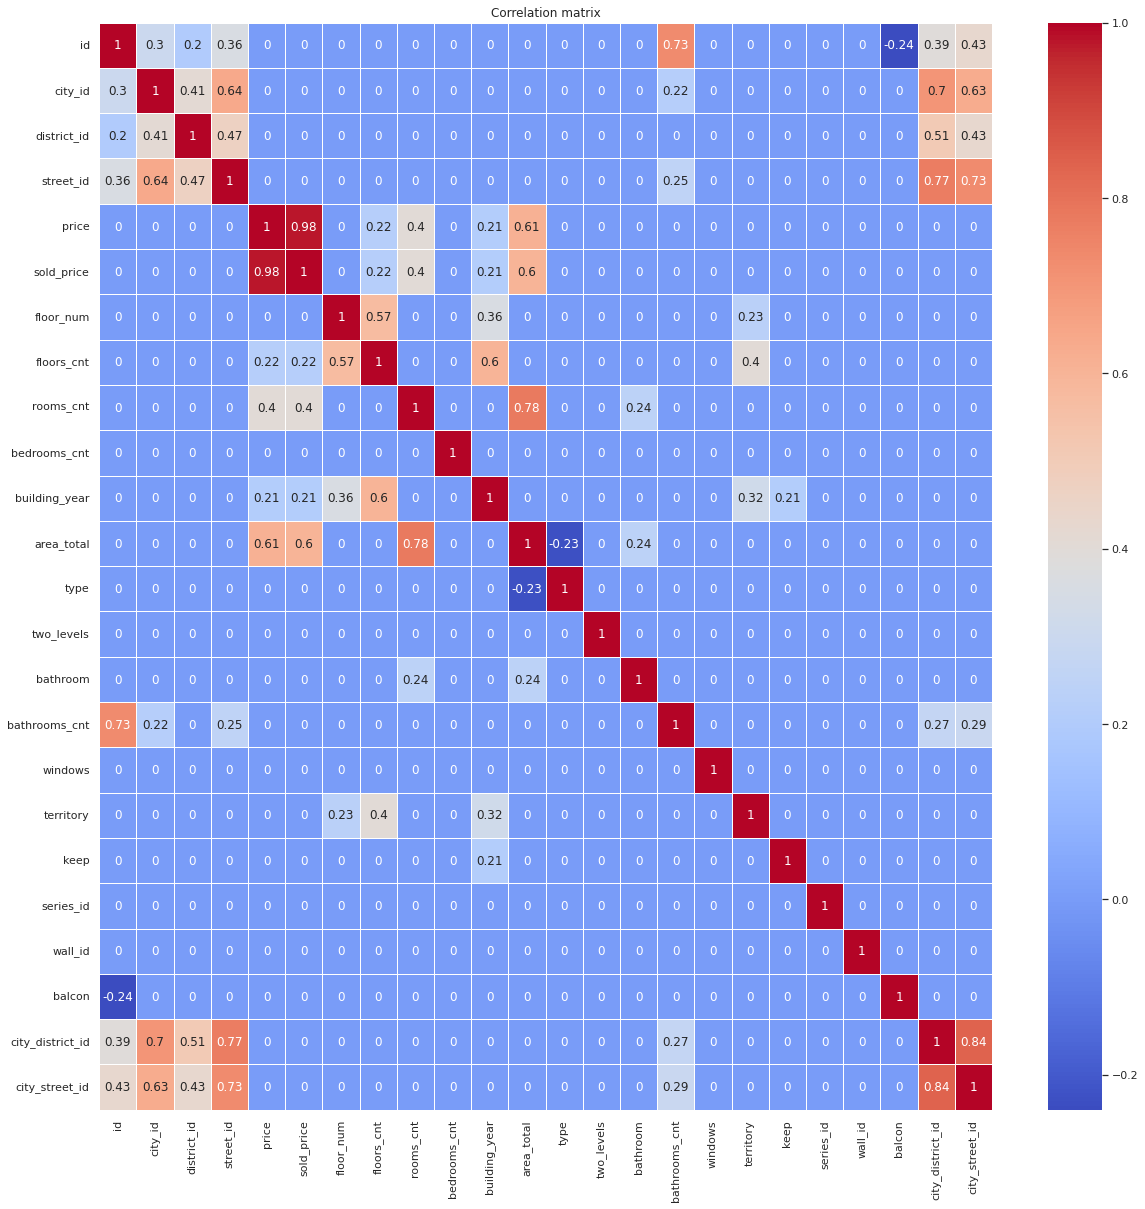

In [27]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1)

corr_matrix = data_transformation.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Построив корреляционную матрицу мы видим что прайс и солд прайс коррелируют на 0,98 и было принято решение оставить только колонку солд прайс**

In [28]:
data_transformation = data_transformation.drop(columns=['price'],axis = 1)

In [29]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59667 entries, 0 to 71757
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      59667 non-null  int64   
 1   city_id                 59667 non-null  int64   
 2   district_id             59667 non-null  int64   
 3   street_id               59667 non-null  int64   
 4   sold_price              59667 non-null  int64   
 5   floor_num               59667 non-null  int64   
 6   floors_cnt              59667 non-null  int64   
 7   rooms_cnt               59667 non-null  int64   
 8   bedrooms_cnt            59667 non-null  int64   
 9   building_year           59667 non-null  int64   
 10  area_total              59667 non-null  float64 
 11  type                    59667 non-null  int64   
 12  two_levels              59667 non-null  int64   
 13  bathroom                59667 non-null  int64   
 14  bathrooms_cnt         

None

(59667, 24)

**Создадим новый столбец под названием sold_price_category в котором будут разбиты цены на недвижимость по категориям с шагом в 500 тыс**

In [30]:
my_range = list(range(1000000, 10000001, 500000))
my_range.insert(0, 0)

bins = my_range

# задаем названия категорий
labels=list(range(0,len(my_range)-1))

# добавляем новый столбец с категориальными значениями
data_transformation['sold_price_category'] = pd.cut(data_transformation['sold_price'], bins=bins, labels=labels)

# выводим результат
display(data_transformation[['sold_price_category','sold_price']].head(10))

,sold_price_category,sold_price
0,8,4880000
1,4,2550000
2,3,2200000
5,3,2200000
8,2,2000000
9,7,4300000
10,5,3450000
11,18,9600000
12,5,3100000
13,5,3500000


**Создадим новый столбец под названием wall_id_category в котором будут разбиты категории стен по самым распространенным**

In [31]:
# задаем границы для категорий
bins = [0,11,12,450]

labels= [0,1,2]

# добавляем новый столбец с категориальными значениями
data_transformation['wall_id_category'] = pd.cut(data_transformation['wall_id'], bins=bins, labels=labels)

# выводим результат
display(data_transformation[['wall_id_category','wall_id']].head(100))

,wall_id_category,wall_id
0,0,11
1,1,12
2,1,12
5,1,12
8,1,12
9,0,11
10,0,11
11,0,11
12,0,11
13,2,14


**Создадим новый столбец под названием series_id_category разделим на 3 класса series_id (44, 45 -1000 и свыше 1000) т.е. количество классов наиболее распространенных серий дома**

In [32]:
# задаем границы для категорий
bins = [0,44,300,2500]

labels= [0,1,2]

# добавляем новый столбец с категориальными значениями
data_transformation['series_id_category'] = pd.cut(data_transformation['series_id'], bins=bins, labels=labels)

# выводим результат
display(data_transformation[['series_id_category','series_id']].head(10))

,series_id_category,series_id
0,1,46
1,1,50
2,1,45
5,1,49
8,1,133
9,0,44
10,0,44
11,0,44
12,1,54
13,2,1587


**Создадим новый столбец под названием area_total_category где разобьем площадь квартиры на  категории  с шагом в 10 метров квадратных**

In [33]:
my_range = list(range(10, 131, 10))
my_range.insert(0, 0)

bins = my_range

# задаем названия категорий
labels=list(range(0,len(my_range)-1))

# добавляем новый столбец с категориальными значениями
data_transformation['area_total_category'] = pd.cut(data_transformation['area_total'], bins=bins, labels=labels)

# выводим результат
display(data_transformation[['area_total_category','area_total']].head(10))

,area_total_category,area_total
0,6,62.0
1,3,40.0
2,4,44.0
5,4,47.3
8,3,33.0
9,5,52.0
10,5,55.0
11,11,114.0
12,6,61.0
13,7,77.0


In [34]:
data_astype_name_columns = ['city_district_id','city_street_id','territory','type', 'bathroom', 'windows', 'keep', 'balcon', 'two_levels']
for name_columns in data_astype_name_columns:
    data_transformation[f'{name_columns}'] = data_transformation[f'{name_columns}'].astype('category')

In [35]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59667 entries, 0 to 71757
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      59667 non-null  int64   
 1   city_id                 59667 non-null  int64   
 2   district_id             59667 non-null  int64   
 3   street_id               59667 non-null  int64   
 4   sold_price              59667 non-null  int64   
 5   floor_num               59667 non-null  int64   
 6   floors_cnt              59667 non-null  int64   
 7   rooms_cnt               59667 non-null  int64   
 8   bedrooms_cnt            59667 non-null  int64   
 9   building_year           59667 non-null  int64   
 10  area_total              59667 non-null  float64 
 11  type                    59667 non-null  category
 12  two_levels              59667 non-null  category
 13  bathroom                59667 non-null  category
 14  bathrooms_cnt         

None

(59667, 28)

**Финальная корреляция**

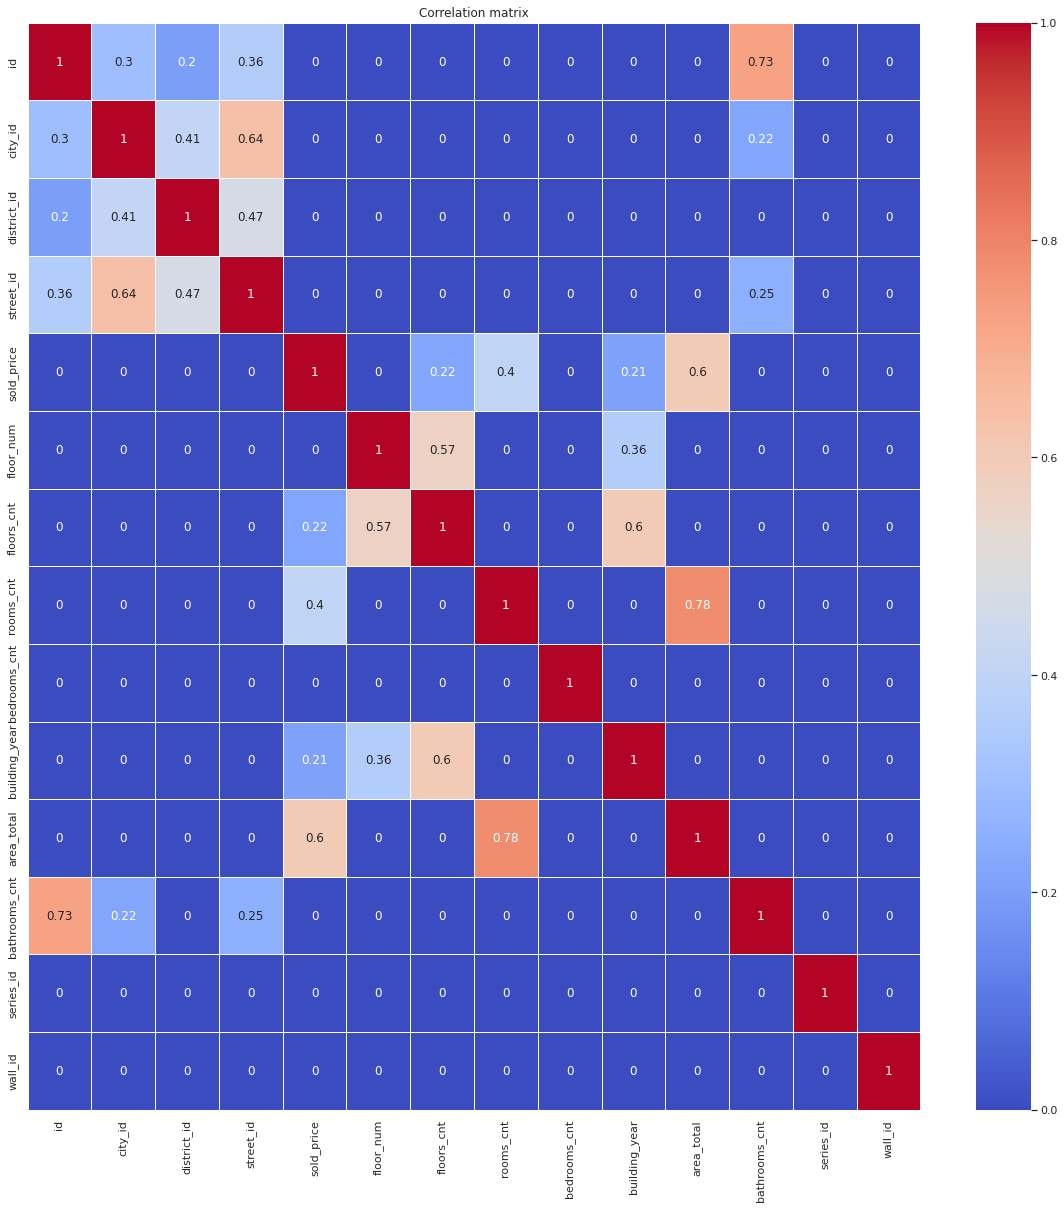

In [36]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1)

corr_matrix = data_transformation.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Удаляем столбцы c id**

In [37]:
data_transformation = data_transformation.drop(columns=['id',
                                                        'city_id',
                                                        'district_id',
                                                        'street_id',
                                                        'series_id',
                                                        'wall_id',],axis = 1)

In [38]:
display(data_transformation.info())
display(data_transformation.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59667 entries, 0 to 71757
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   sold_price              59667 non-null  int64   
 1   floor_num               59667 non-null  int64   
 2   floors_cnt              59667 non-null  int64   
 3   rooms_cnt               59667 non-null  int64   
 4   bedrooms_cnt            59667 non-null  int64   
 5   building_year           59667 non-null  int64   
 6   area_total              59667 non-null  float64 
 7   type                    59667 non-null  category
 8   two_levels              59667 non-null  category
 9   bathroom                59667 non-null  category
 10  bathrooms_cnt           59667 non-null  int64   
 11  windows                 59667 non-null  category
 12  territory               59667 non-null  category
 13  keep                    59667 non-null  category
 14  balcon                

None

(59667, 22)

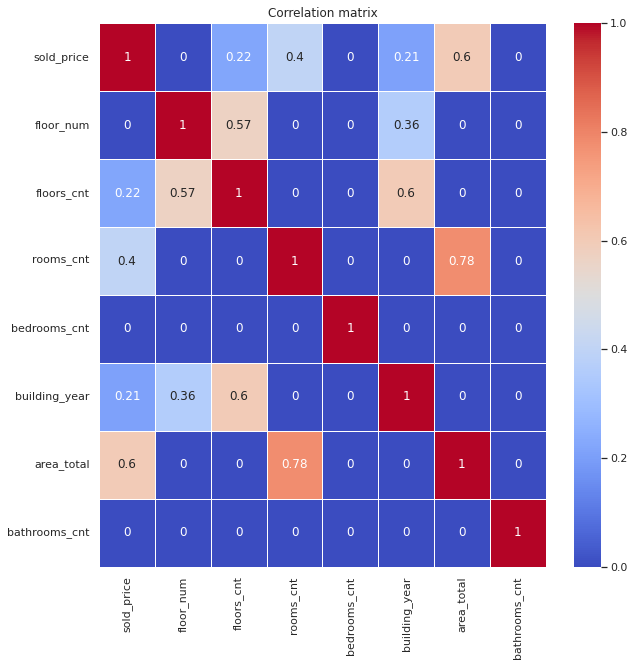

In [39]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)

corr_matrix = data_transformation.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Сохранения в exsel**

In [40]:
data_transformation.to_excel('/content/drive/MyDrive/Colab Notebooks/files_labs/E-SOFT/final_data.xlsx', index=False)